In [2]:
# !pip install pycaret==3.0.4
# !pip install shap
# ! pip install autoviz

In [47]:
import pandas as pd
# import numpy as np
# import pycaret
# import matplotlib
from pycaret.regression import *
from copy import deepcopy 
pd.set_option('display.max_columns', 100)

In [116]:
filename = "./data.csv"
df_test = pd.read_csv(filename)
df_test = df_test.drop(columns=["MonthlyAchievement","HourlyAchievement","Over18"])
df_test = df_test.dropna()

label_mapping = {'Yes': 1, 'No': 0}
# 'Label'列をマップして変換
purpose = "OverTime"
df_test[purpose] = df_test[purpose].map(label_mapping)
purpose = "Attrition"
df_test[purpose] = df_test[purpose].map(label_mapping)

purpose = "DailyAchievement"

# purpose = "MonthlyAchievement"
# df = df.dropna(subset=[purpose])

exp = setup(data = df_test, target = purpose)

,Description,Value
0,Session id,4216
1,Target,DailyAchievement
2,Target type,Regression
3,Original data shape,"(1470, 35)"
4,Transformed data shape,"(1470, 59)"
5,Transformed train set shape,"(1029, 59)"
6,Transformed test set shape,"(441, 59)"
7,Ordinal features,1
8,Numeric features,27
9,Categorical features,7


In [117]:
df_test[:10]

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,...,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,5,2,3,5,3,0,3,intern,0,1
2,25,1,Travel_Rarely,240,Sales,5,3,Marketing,1,142,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,1,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1
5,27,0,Travel_Rarely,1377,Sales,2,3,Life Sciences,1,437,...,5,3,3,5,4,0,4,New_graduate_recruitment,0,2
6,21,1,Travel_Frequently,756,Sales,1,1,Technical Degree,1,478,...,3,3,3,3,2,1,2,direct_recruting,0,1
7,25,0,Travel_Rarely,891,Sales,4,2,Life Sciences,1,527,...,5,3,3,5,4,1,3,agent_A,0,3
8,26,1,Travel_Frequently,426,Human Resources,17,4,Life Sciences,1,608,...,8,2,2,7,7,1,0,agent_A,0,2
9,24,0,Travel_Rarely,691,Research & Development,23,3,Medical,1,639,...,6,3,3,6,5,1,4,New_graduate_recruitment,0,4


In [118]:
best = compare_models(include=["rf"])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,358.8395,172785.0739,415.1057,-0.0591,0.6896,0.8356,2.0370


Processing:   0%|          | 0/9 [00:00<?, ?it/s]

In [119]:
best

RandomForestRegressor(n_jobs=-1, random_state=4216)

In [120]:
df_no_overtime = deepcopy(df_test)
df_no_overtime["Attrition"] = [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,]
df_no_overtime["OverTime"] = 0
df_no_overtime[:5]

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,...,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,5,2,3,5,3,0,3,intern,0,1
2,25,0,Travel_Rarely,240,Sales,5,3,Marketing,1,142,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,0,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,335.4612,146087.3242,382.2137,-0.0595,0.5408,0.5649
1,348.6499,161644.9855,402.0510,-0.0308,0.6961,0.8624
2,344.6775,160426.1494,400.5323,0.0166,0.7180,0.9038
3,400.3432,201784.8331,449.2047,-0.0864,0.7453,0.9353
4,374.1247,190124.7001,436.0329,-0.1036,0.7334,0.9091
5,384.8550,195987.8351,442.7051,-0.0952,0.7557,0.9734
6,325.5234,155049.7135,393.7635,-0.0129,0.6418,0.7276
7,354.0702,166166.2147,407.6349,-0.0378,0.7116,0.8981
8,342.7272,164017.9689,404.9913,-0.0363,0.6688,0.7824


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,325.3163,139422.2411,373.3929,-0.0112,0.5289,0.5457
1,344.9345,157954.8183,397.4353,-0.0072,0.6953,0.8623
2,346.5412,163406.9535,404.2363,-0.0017,0.7251,0.9208
3,382.4906,186104.3486,431.3981,-0.0020,0.7299,0.9156
4,358.1779,173221.4960,416.1989,-0.0055,0.7146,0.8871
5,368.9442,178756.4209,422.7960,0.0011,0.7370,0.9443
6,337.0239,153674.1006,392.0129,-0.0040,0.6416,0.7420
7,356.2472,163689.0255,404.5850,-0.0224,0.7153,0.9159
8,337.0164,158087.0534,397.6016,0.0011,0.6651,0.7817


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


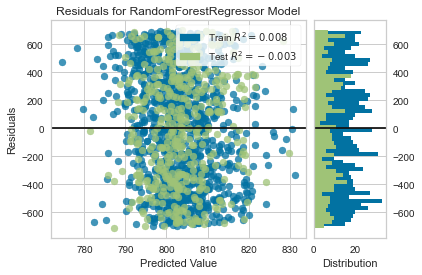

In [121]:
model = create_model(best)
tuned_model = tune_model(model)
plot_model(tuned_model)

In [122]:
df_test.head()

,Age,Attrition,BusinessTravel,DailyAchievement,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork
0,25,0,Travel_Rarely,1280,Research & Development,7,1,Medical,1,143,...,2,2,3,2,2,2,1,intern,0,4
1,27,0,Travel_Rarely,1167,Research & Development,4,2,Life Sciences,1,1259,...,5,2,3,5,3,0,3,intern,0,1
2,25,1,Travel_Rarely,240,Sales,5,3,Marketing,1,142,...,6,1,3,6,4,0,3,agent_A,0,2
3,28,0,Travel_Rarely,440,Research & Development,21,3,Medical,1,221,...,5,2,1,5,2,0,2,New_graduate_recruitment,0,5
4,28,1,Travel_Rarely,529,Research & Development,2,4,Life Sciences,1,364,...,5,5,1,0,0,0,0,New_graduate_recruitment,0,1


In [140]:
final_model = finalize_model(tuned_model)
no_overtime_predictions = predict_model(final_model, data=df_no_overtime)
no_overtime_predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,349.0641,161687.8529,402.1043,0.0063,0.6804,0.8234


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HowToEmploy,Incentive,RemoteWork,DailyAchievement,prediction_label
0,25,0,Travel_Rarely,Research & Development,7,1,Medical,1,143,4,...,3,2,2,2,1,intern,0,4,1280,811.436540
1,27,0,Travel_Rarely,Research & Development,4,2,Life Sciences,1,1259,1,...,3,5,3,0,3,intern,0,1,1167,810.729490
2,25,0,Travel_Rarely,Sales,5,3,Marketing,1,142,3,...,3,6,4,0,3,agent_A,0,2,240,803.233513
3,28,0,Travel_Rarely,Research & Development,21,3,Medical,1,221,3,...,1,5,2,0,2,New_graduate_recruitment,0,5,440,807.548523
4,28,0,Travel_Rarely,Research & Development,2,4,Life Sciences,1,364,1,...,1,0,0,0,0,New_graduate_recruitment,0,1,529,802.497906


In [145]:
s = 0
c = 0
for i in range(len(df_test)):
    if not df_test["Attrition"][i]:
        # print(i,s)
        c += 1
        s += df_test[purpose][i]
    # s += not df_test["Attrition"][i] * df_test[purpose][i]
print(s,"/",c,"=",s/c)


1001818 / 1233 = 812.5044606650446


In [144]:
s = 0
c = 0
for i in range(len(df_test)):
    if not no_overtime_predictions["Attrition"][i] :
        c += 1
        s += no_overtime_predictions["prediction_label"][i]
print(s,"/",c,"=",s/c)

1120312.2974051025 / 1395 = 803.0912526201452


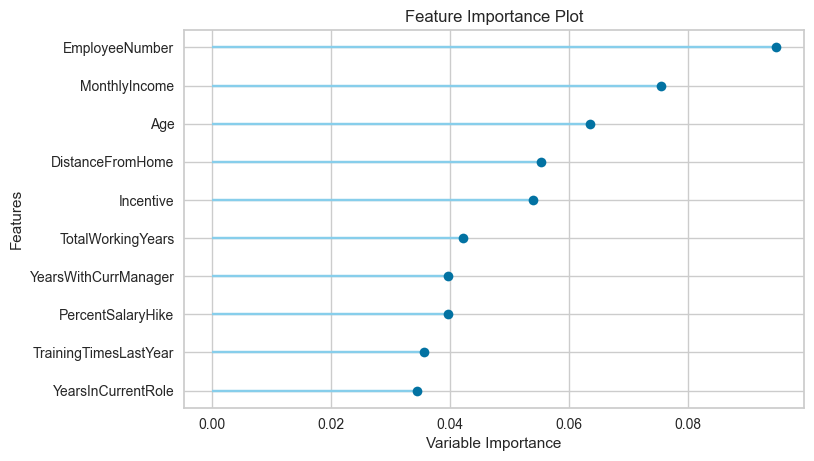

In [107]:
plot_model(model, plot='feature')

In [ ]:
# %matplotlib inline
# eda(display_format="html") 

# from autoviz.AutoViz_Class import AutoViz_Class
# import pandas as pd
# AV = AutoViz_Class()

# dft = AV.AutoViz( "" ,sep=',', depVar=purpose, dfte=df, header=0, verbose=2,
# lowess=False,chart_format='svg',max_rows_analyzed=1500,max_cols_analyzed=30)